<a href="https://colab.research.google.com/github/tallpress/fastai/blob/master/practice_data_vis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data visualisation using 'Countries of the World' dataset

### Getting the data

First we will need the dataset, which we can get from kaggle

In [11]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"tallpress","key":"918f2b4c60b83892fe1ac7a3bb1667a4"}'}

In [0]:
!pip install -q kaggle

In [0]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/kaggle.json

In [14]:
!kaggle datasets list

ref                                                         title                                                size  lastUpdated          downloadCount  
----------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
AnalyzeBoston/crimes-in-boston                              Crimes in Boston                                     10MB  2018-09-04 17:56:03           8840  
matheusfreitag/gas-prices-in-brazil                         Gas Prices in Brazil                                  3MB  2019-07-12 16:23:52           4906  
jealousleopard/goodreadsbooks                               Goodreads-books                                     632KB  2019-06-14 16:35:05           8535  
wkirgsn/electric-motor-temperature                          Electric Motor Temperature                           47MB  2019-06-19 11:12:41           3243  
jolasa/waves-measuring-buoys-data-mooloolaba                Wave

In [0]:
!chmod 600 /root/.kaggle/kaggle.json

In [16]:
!kaggle datasets download -d fernandol/countries-of-the-world

  0% 0.00/13.4k [00:00<?, ?B/s]
100% 13.4k/13.4k [00:00<00:00, 11.4MB/s]


In [17]:
!ls -la

total 32
drwxr-xr-x 1 root root  4096 Aug 16 14:42 .
drwxr-xr-x 1 root root  4096 Aug 16 14:23 ..
drwxr-xr-x 1 root root  4096 Aug 13 16:04 .config
-rw-r--r-- 1 root root 13695 Aug 16 14:42 countries-of-the-world.zip
drwxr-xr-x 1 root root  4096 Aug  2 16:06 sample_data


We now have the zip file which contains the csv

### Getting the data into pandas dataframe

In [0]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import zipfile

%matplotlib inline


In [0]:
with zipfile.ZipFile('countries-of-the-world.zip', 'r') as zip_ref:
    zip_ref.extractall('/content')


In [0]:
df = pd.read_csv('countries of the world.csv')

In [53]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [54]:
df.describe()

,Population,Area (sq. mi.),GDP ($ per capita)
count,2.270000e+02,2.270000e+02,226.000000
mean,2.874028e+07,5.982270e+05,9689.823009
std,1.178913e+08,1.790282e+06,10049.138513
min,7.026000e+03,2.000000e+00,500.000000
25%,4.376240e+05,4.647500e+03,1900.000000
50%,4.786994e+06,8.660000e+04,5550.000000
75%,1.749777e+07,4.418110e+05,15700.000000
max,1.313974e+09,1.707520e+07,55100.000000


Some of the columns' values are strings using , as the decimal point, we need to reformat this so python can read the values.

In [0]:
df.columns = (["country","region","population","area","density","coastline",
               "migration","infant_mortality","gdp","literacy","phones",
               "arable","crops","other","climate","birthrate","deathrate",
               "agriculture","industry","service"])

df.country = df.country.astype('category')
df.region = df.region.astype('category')
df.density = df.density.str.replace(",",".").astype(float)
df.coastline = df.coastline.str.replace(",",".").astype(float)
df.migration = df.migration.str.replace(",",".").astype(float)
df.infant_mortality = df.infant_mortality.str.replace(",",".").astype(float)
df.literacy = df.literacy.str.replace(",",".").astype(float)
df.phones = df.phones.str.replace(",",".").astype(float)
df.arable = df.arable.str.replace(",",".").astype(float)
df.crops = df.crops.str.replace(",",".").astype(float)
df.other = df.other.str.replace(",",".").astype(float)
df.climate = df.climate.str.replace(",",".").astype(float)
df.birthrate = df.birthrate.str.replace(",",".").astype(float)
df.deathrate = df.deathrate.str.replace(",",".").astype(float)
df.agriculture = df.agriculture.str.replace(",",".").astype(float)
df.industry = df.industry.str.replace(",",".").astype(float)
df.service = df.service.str.replace(",",".").astype(float)


In [56]:
df.head()

,country,region,population,area,density,coastline,migration,infant_mortality,gdp,literacy,phones,arable,crops,other,climate,birthrate,deathrate,agriculture,industry,service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [62]:
df.describe()

,population,area,density,coastline,migration,infant_mortality,gdp,literacy,phones,arable,crops,other,climate,birthrate,deathrate,agriculture,industry,service
count,2.270000e+02,2.270000e+02,227.000000,227.000000,224.000000,224.000000,226.000000,209.000000,223.000000,225.000000,225.000000,225.000000,205.000000,224.000000,223.000000,212.000000,211.000000,212.000000
mean,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.506964,9689.823009,82.838278,236.061435,13.797111,4.564222,81.638311,2.139024,22.114732,9.241345,0.150844,0.282711,0.565283
std,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.889269,35.389899,10049.138513,19.722173,227.991829,13.040402,8.361470,16.140835,0.699397,11.176716,4.990026,0.146798,0.138272,0.165841
min,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.927500,8.150000,1900.000000,70.600000,37.800000,3.220000,0.190000,71.650000,2.000000,12.672500,5.910000,0.037750,0.193000,0.429250
50%,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.000000,5550.000000,92.500000,176.200000,10.420000,1.030000,85.700000,2.000000,18.790000,7.840000,0.099000,0.272000,0.571000
75%,1.749777e+07,4.418110e+05,190.150000,10.345000,0.997500,55.705000,15700.000000,98.000000,389.650000,20.000000,4.440000,95.440000,3.000000,29.820000,10.605000,0.221000,0.341000,0.678500
max,1.313974e+09,1.707520e+07,16271.500000,870.660000,23.060000,191.190000,55100.000000,100.000000,1035.600000,62.110000,50.680000,100.000000,4.000000,50.730000,29.740000,0.769000,0.906000,0.954000


### Basic visualisation

Let us have a look at GDP vs Net migration as an intial "easy" plot

In [0]:
gdp_mig_df = df[['country', 'migration', 'gdp']]

In [58]:
gdp_mig_df.head()

,country,migration,gdp
0,Afghanistan,23.06,700.0
1,Albania,-4.93,4500.0
2,Algeria,-0.39,6000.0
3,American Samoa,-20.71,8000.0
4,Andorra,6.60,19000.0


To clean the data we can drop all rows which have NaN values

In [0]:
clean_gdp_mig_df = gdp_mig_df.dropna()

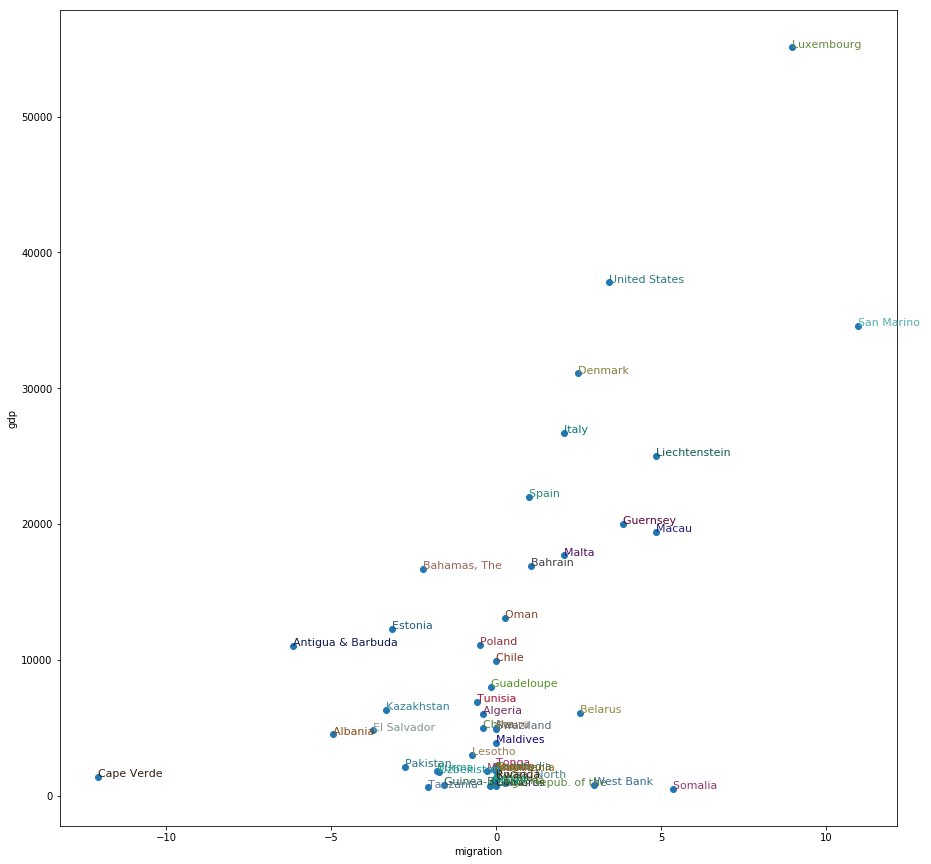

In [60]:
sample = clean_gdp_mig_df.sample(50)
X = sample['migration']
Y = sample['gdp']

plt.figure(figsize=(15,15))
plt.scatter(X, Y)
for i, x, y in zip(sample['country'], X, Y):
  n = np.random.rand(3)*0.7
  plt.text(x,y,i, color=n, fontsize=11)
plt.xlabel("migration")
plt.ylabel("gdp")
plt.show()

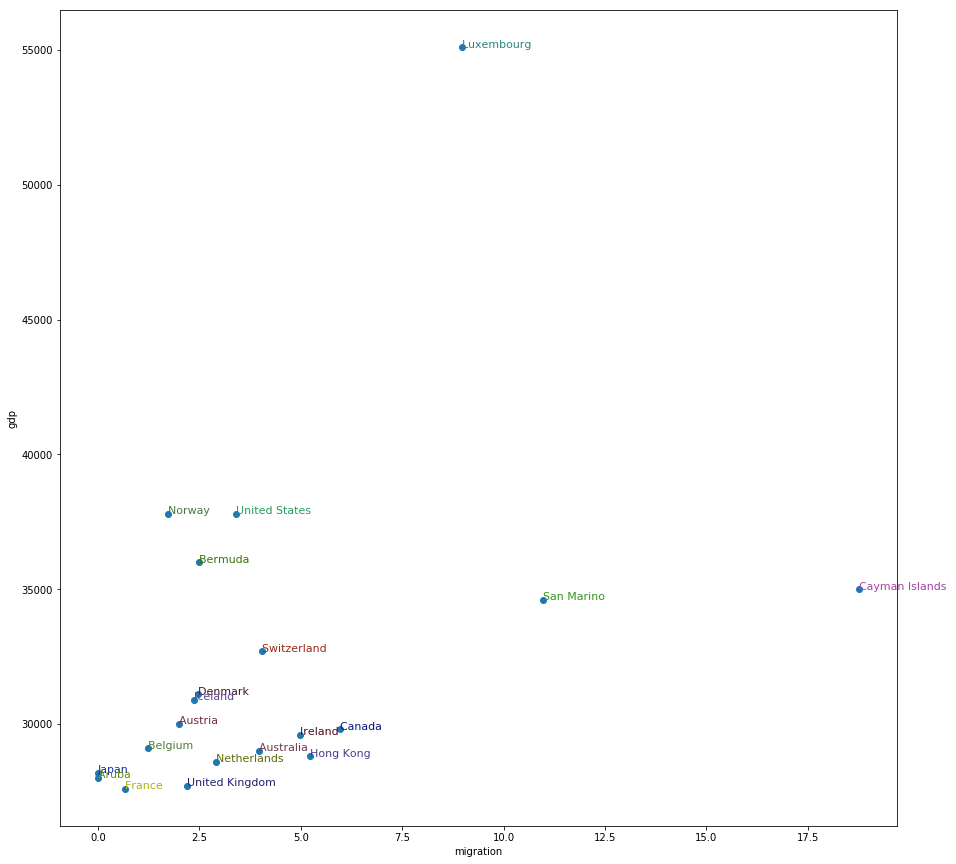

In [61]:
richest = clean_gdp_mig_df.nlargest(20, 'gdp')
X = richest['migration']
Y = richest['gdp']

plt.figure(figsize=(15,15))
plt.scatter(X, Y)
for i, x, y in zip(richest['country'], X, Y):
  n = np.random.rand(3)*0.7
  plt.text(x,y,i, color=n, fontsize=11)
plt.xlabel("migration")
plt.ylabel("gdp")
plt.show()

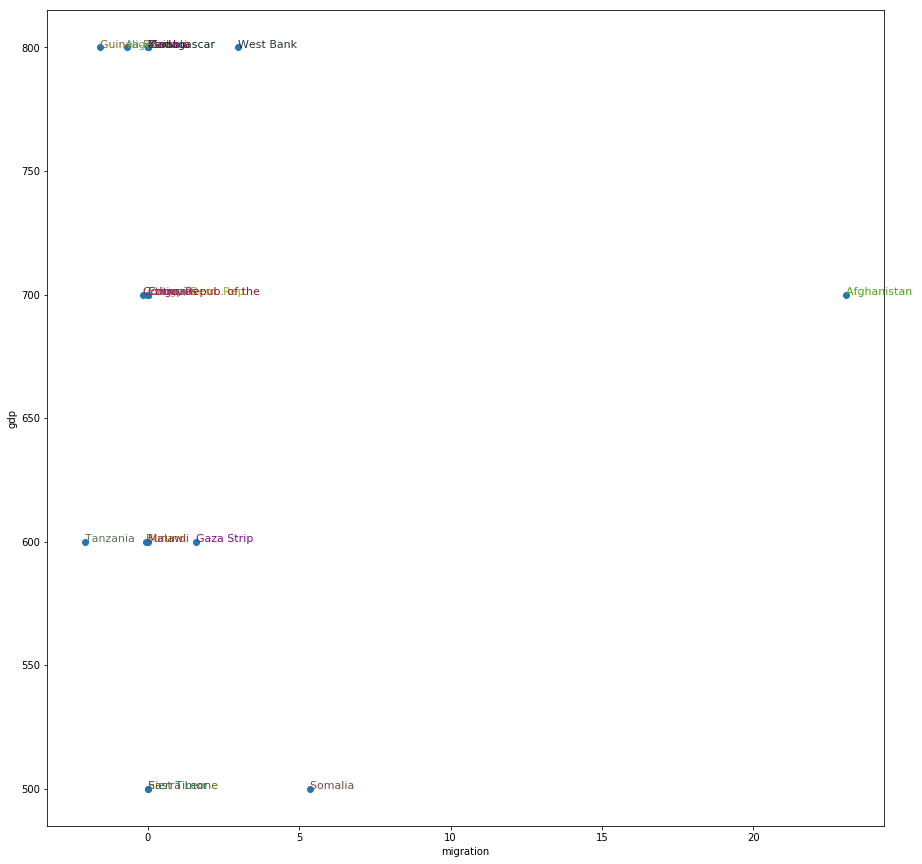

In [63]:
poorest = clean_gdp_mig_df.nsmallest(20, 'gdp')
X = poorest['migration']
Y = poorest['gdp']

plt.figure(figsize=(15,15))
plt.scatter(X, Y)
for i, x, y in zip(poorest['country'], X, Y):
  n = np.random.rand(3)*0.7
  plt.text(x,y,i, color=n, fontsize=11)
plt.xlabel("migration")
plt.ylabel("gdp")
plt.show()

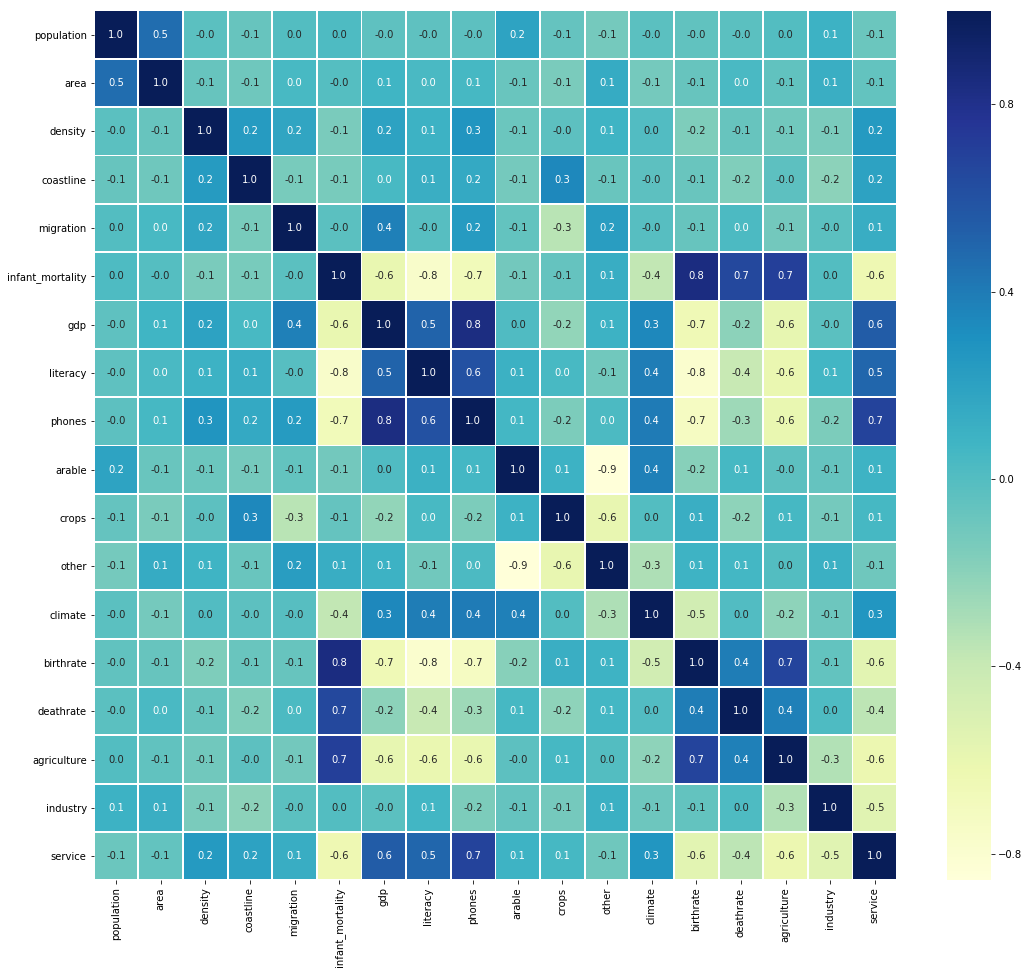

In [67]:
import seaborn as sns
f,ax = plt.subplots(figsize=(18, 16))
sns.heatmap(df.corr(), annot=True, linewidths=.8, fmt= '.1f',ax=ax, cmap="YlGnBu")


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


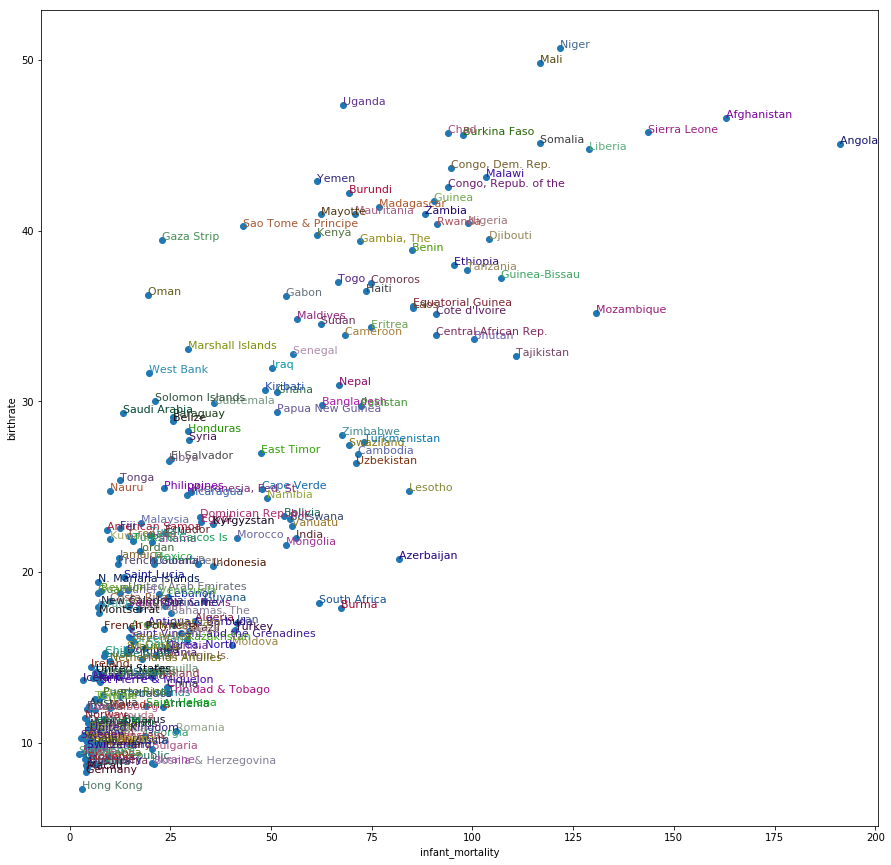

In [72]:
X = df['infant_mortality']
Y = df['birthrate']

plt.figure(figsize=(15,15))
plt.scatter(X, Y)
for i, x, y in zip(df['country'], X, Y):
  n = np.random.rand(3)*0.7
  plt.text(x,y,i, color=n, fontsize=11)
plt.xlabel("infant_mortality")
plt.ylabel("birthrate")
plt.show()